In [1]:
import mlrose_hiive
import numpy as np
import pandas as pd
np.random.seed(1)

In [3]:
rhc_run_stats = pd.read_pickle("./pickles/flipFlop_rhc_run_stats.pkl")
rhc_run_curves = pd.read_pickle("./pickles/flipFlop_rhc_run_curves.pkl")
sa_run_stats = pd.read_pickle("./pickles/flipFlop_sa_run_stats.pkl")
sa_run_curves = pd.read_pickle("./pickles/flipFlop_sa_run_curves.pkl")
ga_run_stats = pd.read_pickle("./pickles/flipFlop_ga_run_stats.pkl")
ga_run_curves = pd.read_pickle("./pickles/flipFlop_ga_run_curves.pkl")
mmc_run_stats = pd.read_pickle("./pickles/flipFlop_mmc_run_stats.pkl")
mmc_run_curves = pd.read_pickle("./pickles/flipFlop_mmc_run_curves.pkl")

## Define a Fitness Function

In [2]:
# Define the length of the FlipFlop problem.
flip_len = 500

# Initialize a FlipFlop optimization problem with the defined length.
problem = mlrose_hiive.FlipFlopOpt(length=flip_len)

### Random Hill Climb

In [3]:
%%time

# Initialize RHC optimization with specific parameters.
runner_return = mlrose_hiive.RHCRunner(problem, 
                                       experiment_name="first_try", 
                                       iteration_list=[10000],
                                       seed=1, 
                                       max_attempts=100, 
                                       restart_list=[100])

# Execute the RHC optimization.
rhc_run_stats, rhc_run_curves = runner_return.run()

Wall time: 50min 1s


In [27]:
# Filter out initial state (Iteration = 0) to focus on the optimization progress.
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()

# Calculate the average and maximum fitness values.
print("Random Hill Climbing - Overall Results:")
print("--------------------------------------")
print("Average Fitness:", last_iters.Fitness.mean())
print("Maximum Fitness:", last_iters.Fitness.max())

# Identify and display the longest iteration time.
print("Average Time for an Iteration:", last_iters.Time.mean())
print("\n")

# Group results by Number of Restarts and calculate the average fitness.
print("Random Hill Climbing - Average Fitness by Number of Restarts:")
print("-------------------------------------------------------------")
print(last_iters.groupby("current_restart").Fitness.mean())
print("\n")

# Group results by Number of Restarts and calculate the average time taken.
print("Random Hill Climbing - Average Time by Number of Restarts:")
print("----------------------------------------------------------")
print(last_iters.groupby("current_restart").Time.mean())

Random Hill Climbing - Overall Results:
--------------------------------------
Average Fitness: 390.43564356435644
Maximum Fitness: 414.0
Average Time for an Iteration: 1026.6147457108914


Random Hill Climbing - Average Fitness by Number of Restarts:
-------------------------------------------------------------
current_restart
0      378.0
1      390.0
2      376.0
3      377.0
4      393.0
       ...  
96     397.0
97     382.0
98     397.0
99     385.0
100    388.0
Name: Fitness, Length: 101, dtype: float64


Random Hill Climbing - Average Time by Number of Restarts:
----------------------------------------------------------
current_restart
0         1.024746
1         3.222039
2         5.080985
3         6.917032
4        10.663103
          ...     
96     2796.704143
97     2844.152636
98     2908.870154
99     2956.010089
100    3001.666880
Name: Time, Length: 101, dtype: float64


In [4]:
# Filter out initial state (Iteration = 0) to focus on the optimization progress.
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()

# Calculate the average and maximum fitness values.
average_fitness = last_iters.Fitness.mean()
max_fitness = last_iters.Fitness.max()

# Display the fitness results.
print("Average Fitness:", average_fitness)
print("Maximum Fitness:", max_fitness)

# Identify and display the longest iteration time.
max_time = last_iters.Time.max()
print("Longest Time for an Iteration:", max_time)

Average Fitness: 390.43564356435644
Maximum Fitness: 414.0
Longest Time for an Iteration: 3001.666879700001


In [29]:
# 1. Identify the best parameter set based on maximum fitness.
best_restart = last_iters.loc[last_iters['Fitness'].idxmax()]['current_restart']

# 2. Filter the results to only include data for the best parameter set.
best_params_data = last_iters[last_iters['current_restart'] == best_restart]

# 3. Compute the metrics for the best parameter set.
print(f"Random Hill Climbing - Results for Best Restart Parameter ({best_restart}):")
print("--------------------------------------------------------------------------")
print("Average Fitness:", best_params_data.Fitness.mean())
print("Maximum Fitness:", best_params_data.Fitness.max())
print("Average Time for an Iteration:", best_params_data.Time.mean())
print("\n")

Random Hill Climbing - Results for Best Restart Parameter (65):
--------------------------------------------------------------------------
Average Fitness: 414.0
Maximum Fitness: 414.0
Average Time for an Iteration: 1344.0951687000006




In [5]:
# Find the index of the run with the highest fitness value
best_index_in_curve = rhc_run_curves.Fitness.idxmax()

# Extract the restart setting corresponding to the best fitness achieved
best_restart = rhc_run_curves.iloc[best_index_in_curve].current_restart

# Filter the curves to only include data from the best restart setting
best_curve = rhc_run_curves[rhc_run_curves.current_restart == best_restart]

# Reset the index for the filtered data for ease of access
best_curve.reset_index(drop=True, inplace=True)

best_restart

65.0

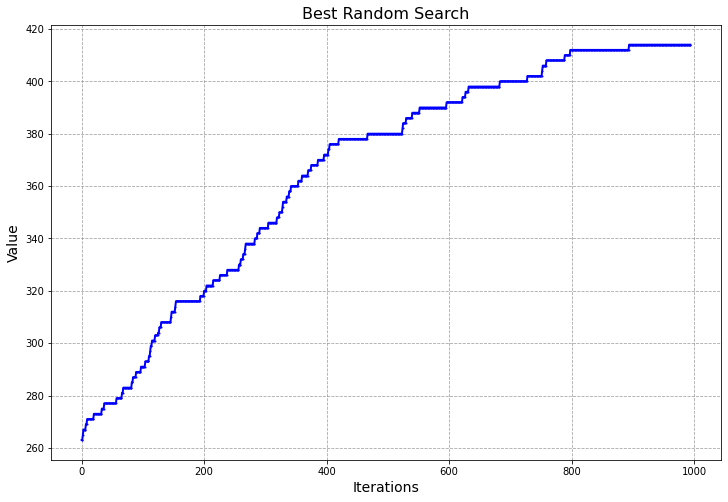

In [6]:
# Plotting the best curve's fitness over iterations
ax = best_curve.Fitness.plot(lw=2, 
                             color='blue',     # Set the line color to blue
                             marker='.', 
                             markersize=2, 
                             figsize=(12,8), 
                             grid=True,        # Enable grid
                             title='Best Random Search')

# Set x-axis label with increased font size
ax.set_xlabel("Iterations", fontsize=14)

# Set y-axis label with increased font size
ax.set_ylabel("Value", fontsize=14)

# Set the title's font size larger
ax.set_title('Best Random Search', fontsize=16)

# Set grid appearance to grey and dotted
ax.grid(True, linestyle='--', which='both', color='grey', alpha=.7)

## Simulated Annealing

In [7]:
%%time

# Set up and execute Simulated Annealing optimization using various temperatures and decay strategies.
# The goal is to see how different parameters affect the performance of the algorithm on the specified problem.
sa = mlrose_hiive.SARunner(problem, 
                           experiment_name="SA_Exp", 
                           iteration_list=[100000],
                           temperature_list=[1, 10, 50, 100, 250],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay],
                           seed=1, 
                           max_attempts=100)

# Run the Simulated Annealing and capture results.
sa_run_stats, sa_run_curves = sa.run()   

Wall time: 39min 56s


In [28]:
# Filter out the initial state (Iteration = 0) from the Simulated Annealing run stats.
last_iters_sa = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()

# Convert Temperature objects to their string representations.
last_iters_sa["TempStr"] = last_iters_sa["Temperature"].apply(str)

# Group the results by the string representation of Temperature and calculate the average fitness.
print("SA - Average Fitness by Temperature:")
print("--------------------------------")
grouped_by_temperature = last_iters_sa.groupby("TempStr").Fitness.mean()
print(grouped_by_temperature)
print("\n")

# Additionally, you can check the average time taken for each temperature.
print("SA - Average Time by Temperature:")
print("----------------------------")
grouped_time_by_temperature = last_iters_sa.groupby("TempStr").Time.mean()
print(grouped_time_by_temperature)

SA - Average Fitness by Temperature:
--------------------------------
TempStr
1      485.5
10     484.0
100    480.5
250    486.0
50     487.0
Name: Fitness, dtype: float64


SA - Average Time by Temperature:
----------------------------
TempStr
1      236.544864
10     181.877105
100    105.881486
250    385.139610
50     286.992989
Name: Time, dtype: float64


In [8]:
# Filter out initial state (Iteration = 0) to focus on the optimization progress with Simulated Annealing.
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()

# Calculate the average and maximum fitness values.
average_fitness = last_iters.Fitness.mean()
max_fitness = last_iters.Fitness.max()

# Display the fitness results.
print("Average Fitness:", average_fitness)
print("Maximum Fitness:", max_fitness)

# Calculate and display the average iteration time.
average_time = last_iters.Time.mean()
print("Average Time for an Iteration:", average_time)

Average Fitness: 484.6
Maximum Fitness: 488.0
Average Time for an Iteration: 239.2872109400001


In [30]:
# 1. Identify the best parameter set based on maximum fitness.
best_temp = sa_run_stats.loc[sa_run_stats['Fitness'].idxmax()]['Temperature']
best_decay_strategy = sa_run_stats.loc[sa_run_stats['Fitness'].idxmax()]['schedule_type']

# 2. Filter the results to only include data for the best parameter set.
best_params_data = sa_run_stats[(sa_run_stats['Temperature'] == best_temp) & 
                                (sa_run_stats['schedule_type'] == best_decay_strategy)]

# 3. Compute the metrics for the best parameter set.
print(f"Simulated Annealing - Results for Best Parameters (Temperature: {best_temp}, Decay Strategy: {best_decay_strategy}):")
print("-----------------------------------------------------------------------------------------------------------------")
print("Average Fitness:", best_params_data.Fitness.mean())
print("Maximum Fitness:", best_params_data.Fitness.max())
print("Average Time for an Iteration:", best_params_data.Time.mean())
print("\n")

Simulated Annealing - Results for Best Parameters (Temperature: 50, Decay Strategy: exponential):
-----------------------------------------------------------------------------------------------------------------
Average Fitness: 363.5
Maximum Fitness: 488.0
Average Time for an Iteration: 110.88078830000086




In [9]:
# Find the index of the run with the highest fitness value.
best_index_in_curve = sa_run_curves.Fitness.idxmax()

# Extract the temperature setting corresponding to the best fitness achieved.
best_temperature = sa_run_curves.iloc[best_index_in_curve].Temperature

# Filter the curves to only include data from the best temperature setting.
best_curve = sa_run_curves[sa_run_curves.Temperature == best_temperature]

# Reset the index for the filtered data for ease of access.
best_curve.reset_index(drop=True, inplace=True)

best_temperature

ExpDecay(init_temp=50, exp_const=0.005, min_temp=0.001)

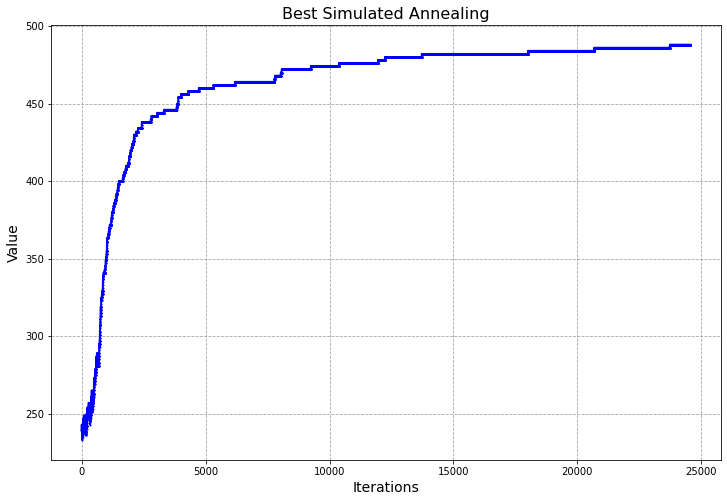

In [10]:
# Plotting the best curve's fitness over iterations
ax = best_curve.Fitness.plot(lw=2, 
                             color='blue',     # Set the line color to blue
                             marker='.', 
                             markersize=2, 
                             figsize=(12,8), 
                             grid=True,        # Enable grid
                             title='Best Simulated Annealing')

# Set x-axis label with increased font size
ax.set_xlabel("Iterations", fontsize=14)

# Set y-axis label with increased font size
ax.set_ylabel("Value", fontsize=14)

# Set the title's font size larger
ax.set_title('Best Simulated Annealing', fontsize=16)

# Set grid appearance to grey and dotted
ax.grid(True, linestyle='--', which='both', color='grey', alpha=.7)

## Genetic Alg

In [11]:
%%time

# Set up Genetic Algorithm (GA) runner with various parameters for optimization.
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=1,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[20,50,100],       # Different population sizes to experiment with.
                          mutation_rates=[0.1, 0.25, 0.5])    # Different mutation rates to experiment with.

# Execute the GA optimization and store results.
ga_run_stats, ga_run_curves = ga.run()   

Wall time: 32.9 s


In [25]:
# Filter out the data from the initial state (Iteration = 0) for the Genetic Algorithm run.
last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()

# Print the maximum fitness, average fitness, and the average time per iteration for the Genetic Algorithm.
print("Genetic Algorithm - Max Fitness, Average Fitness, and Average Time per Iteration:")
print("--------------------------------------------------------------------------------")
print("Max Fitness:", last_iters.Fitness.max())
print("Average Fitness:", last_iters.Fitness.mean())
print("Average Time per Iteration:", last_iters.Time.mean())
print("\n")

# Group the results by Mutation Rate and calculate the average fitness for each rate.
print("Genetic Algorithm - Average Fitness by Mutation Rate:")
print("-----------------------------------------------------")
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print("\n")

# Group the results by Mutation Rate and calculate the average time taken for each rate.
print("Genetic Algorithm - Average Time by Mutation Rate:")
print("--------------------------------------------------")
print(last_iters.groupby("Mutation Rate").Time.mean())
print("\n")

# Group the results by Population Size and calculate the average fitness for each population size.
print("Genetic Algorithm - Average Fitness by Population Size:")
print("-------------------------------------------------------")
print(last_iters.groupby("Population Size").Fitness.mean())
print("\n")

# Group the results by Population Size and calculate the average time taken for each population size.
print("Genetic Algorithm - Average Time by Population Size:")
print("---------------------------------------------------")
print(last_iters.groupby("Population Size").Time.mean())

Genetic Algorithm - Max Fitness, Average Fitness, and Average Time per Iteration:
--------------------------------------------------------------------------------
Max Fitness: 442.0
Average Fitness: 411.0
Average Time per Iteration: 3.6417645333333186


Genetic Algorithm - Average Fitness by Mutation Rate:
-----------------------------------------------------
Mutation Rate
0.10    392.666667
0.25    411.666667
0.50    428.666667
Name: Fitness, dtype: float64


Genetic Algorithm - Average Time by Mutation Rate:
--------------------------------------------------
Mutation Rate
0.10    3.384545
0.25    3.041609
0.50    4.499140
Name: Time, dtype: float64


Genetic Algorithm - Average Fitness by Population Size:
-------------------------------------------------------
Population Size
20     387.666667
50     417.666667
100    427.666667
Name: Fitness, dtype: float64


Genetic Algorithm - Average Time by Population Size:
---------------------------------------------------
Population Size
20  

In [13]:
# Filter out initial state (Iteration = 0) to focus on the optimization progress with Genetic Algorithm.
last_iters_ga = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()

# Calculate the average and maximum fitness values for the GA run.
average_fitness_ga = last_iters_ga.Fitness.mean()
max_fitness_ga = last_iters_ga.Fitness.max()

# Display the fitness results from the GA run.
print("GA Average Fitness:", average_fitness_ga)
print("GA Maximum Fitness:", max_fitness_ga)

# Calculate and display the average iteration time for the GA run.
average_time_ga = last_iters_ga.Time.mean()
print("GA Average Time for an Iteration:", average_time_ga)

GA Average Fitness: 411.0
GA Maximum Fitness: 442.0
GA Average Time for an Iteration: 3.6417645333333186


In [31]:
# 1. Identify the best parameter set based on maximum fitness.
best_pop_size = ga_run_stats.loc[ga_run_stats['Fitness'].idxmax()]['Population Size']
best_mutation_rate = ga_run_stats.loc[ga_run_stats['Fitness'].idxmax()]['Mutation Rate']

# 2. Filter the results to only include data for the best parameter set.
best_params_data = ga_run_stats[(ga_run_stats['Population Size'] == best_pop_size) & 
                                (ga_run_stats['Mutation Rate'] == best_mutation_rate)]

# 3. Compute the metrics for the best parameter set.
print(f"Genetic Algorithm - Results for Best Parameters (Population Size: {best_pop_size}, Mutation Rate: {best_mutation_rate}):")
print("---------------------------------------------------------------------------------------------------------------------")
print("Average Fitness:", best_params_data.Fitness.mean())
print("Maximum Fitness:", best_params_data.Fitness.max())
print("Average Time for an Iteration:", best_params_data.Time.mean())
print("\n")

Genetic Algorithm - Results for Best Parameters (Population Size: 100, Mutation Rate: 0.5):
---------------------------------------------------------------------------------------------------------------------
Average Fitness: 340.5
Maximum Fitness: 442.0
Average Time for an Iteration: 3.6448093499993774




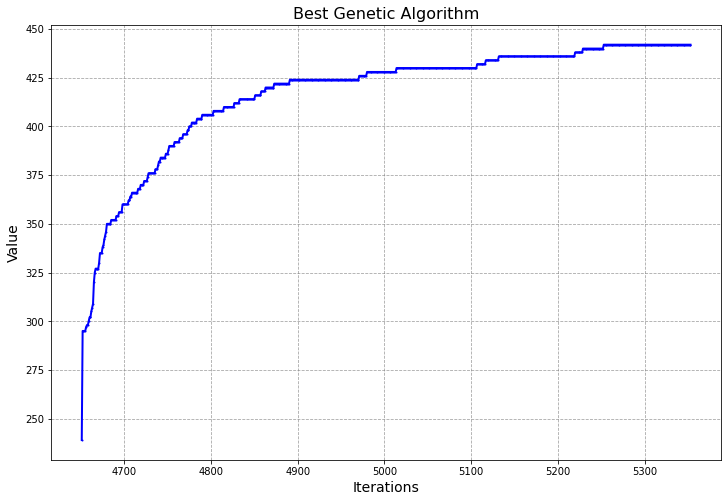

In [14]:
# Find the parameters corresponding to the run with the highest fitness value for GA
best_params = ga_run_curves.iloc[ga_run_curves.Fitness.idxmax()]

best_population_size = best_params['Population Size']
best_mutation_rate = best_params['Mutation Rate']

# Filter the curves to only include data from the best run
best_ga_curve = ga_run_curves[(ga_run_curves['Population Size'] == best_population_size) & 
                              (ga_run_curves['Mutation Rate'] == best_mutation_rate)]

# Plotting the best GA curve's fitness over iterations
ax = best_ga_curve.Fitness.plot(lw=2, 
                                color='blue',     # Set the line color to blue
                                marker='.', 
                                markersize=2, 
                                figsize=(12,8), 
                                grid=True,        # Enable grid
                                title='Best Genetic Algorithm')

# Set x-axis label with increased font size
ax.set_xlabel("Iterations", fontsize=14)

# Set y-axis label with increased font size
ax.set_ylabel("Value", fontsize=14)

# Set the title's font size larger
ax.set_title('Best Genetic Algorithm', fontsize=16)

# Set grid appearance to grey and dotted
ax.grid(True, linestyle='--', which='both', color='grey', alpha=.7)

## MIMIC

In [15]:
%%time

# Initialize MIMIC optimization with various settings.
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                          experiment_name="MMC_Exp",
                          seed=1,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[20,50,100],
                          keep_percent_list=[0.25, 0.5, 0.75],
                          use_fast_mimic=True)

# Run MIMIC and capture the statistics and curve results.
mmc_run_stats, mmc_run_curves = mmc.run()

Wall time: 12min 12s


In [26]:
# Filter out the data from the initial state (Iteration = 0) for the MIMIC run.
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()

# Print the maximum fitness, average fitness, and the average time per iteration.
print("MIMIC - Max Fitness, Average Fitness, and Average Time per Iteration:")
print("--------------------------------------------------------------------")
print("Max Fitness:", last_iters.Fitness.max())
print("Average Fitness:", last_iters.Fitness.mean())
print("Average Time per Iteration:", last_iters.Time.mean())
print("\n")

# Group the results by Keep Percent and calculate the average fitness and average time for each percent.
print("MIMIC - Average Fitness by Keep Percent:")
print("----------------------------------------")
print(last_iters.groupby("Keep Percent").Fitness.mean())
print("\n")

print("MIMIC - Average Time by Keep Percent:")
print("------------------------------------")
print(last_iters.groupby("Keep Percent").Time.mean())
print("\n")

# Group the results by Population Size and calculate the average fitness for each population size.
print("MIMIC - Average Fitness by Population Size:")
print("-------------------------------------------")
print(last_iters.groupby("Population Size").Fitness.mean())
print("\n")

# Group the results by Population Size and calculate the average time taken for each population size.
print("MIMIC - Average Time by Population Size:")
print("---------------------------------------")
print(last_iters.groupby("Population Size").Time.mean())

MIMIC - Max Fitness, Average Fitness, and Average Time per Iteration:
--------------------------------------------------------------------
Max Fitness: 363.0
Average Fitness: 322.8888888888889
Average Time per Iteration: 81.34009436666686


MIMIC - Average Fitness by Keep Percent:
----------------------------------------
Keep Percent
0.25    319.000000
0.50    329.333333
0.75    320.333333
Name: Fitness, dtype: float64


MIMIC - Average Time by Keep Percent:
------------------------------------
Keep Percent
0.25    66.129783
0.50    87.493579
0.75    90.396921
Name: Time, dtype: float64


MIMIC - Average Fitness by Population Size:
-------------------------------------------
Population Size
20     286.333333
50     324.666667
100    357.666667
Name: Fitness, dtype: float64


MIMIC - Average Time by Population Size:
---------------------------------------
Population Size
20      38.154327
50      77.502226
100    128.363730
Name: Time, dtype: float64


In [17]:
# Filter out initial state (Iteration = 0) to focus on the optimization progress with MIMIC.
last_iters_mmc = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()

# Calculate the average and maximum fitness values for the MMC run.
average_fitness_mmc = last_iters_mmc.Fitness.mean()
max_fitness_mmc = last_iters_mmc.Fitness.max()

# Display the fitness results from the MMC run.
print("MMC Average Fitness:", average_fitness_mmc)
print("MMC Maximum Fitness:", max_fitness_mmc)

# Calculate and display the average iteration time for the MMC run.
average_time_mmc = last_iters_mmc.Time.mean()
print("MMC Average Time for an Iteration:", average_time_mmc)

MMC Average Fitness: 322.8888888888889
MMC Maximum Fitness: 363.0
MMC Average Time for an Iteration: 81.34009436666686


In [32]:
# 1. Identify the best parameter set based on maximum fitness.
best_pop_size = mmc_run_stats.loc[mmc_run_stats['Fitness'].idxmax()]['Population Size']
best_keep_percent = mmc_run_stats.loc[mmc_run_stats['Fitness'].idxmax()]['Keep Percent']

# 2. Filter the results to only include data for the best parameter set.
best_params_data = mmc_run_stats[(mmc_run_stats['Population Size'] == best_pop_size) & 
                                 (mmc_run_stats['Keep Percent'] == best_keep_percent)]

# 3. Compute the metrics for the best parameter set.
print(f"MIMIC - Results for Best Parameters (Population Size: {best_pop_size}, Keep Percent: {best_keep_percent}):")
print("----------------------------------------------------------------------------------------------------------------")
print("Average Fitness:", best_params_data.Fitness.mean())
print("Maximum Fitness:", best_params_data.Fitness.max())
print("Average Time for an Iteration:", best_params_data.Time.mean())
print("\n")

MIMIC - Results for Best Parameters (Population Size: 100, Keep Percent: 0.5):
----------------------------------------------------------------------------------------------------------------
Average Fitness: 301.0
Maximum Fitness: 363.0
Average Time for an Iteration: 78.53281365000112




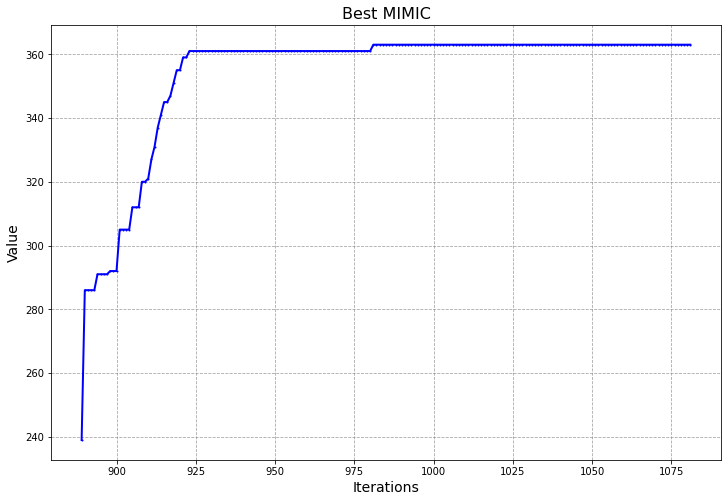

In [18]:
# Find the parameters corresponding to the run with the highest fitness value for MMC
best_params_mmc = mmc_run_curves.iloc[mmc_run_curves.Fitness.idxmax()]

best_population_size_mmc = best_params_mmc['Population Size']
best_keep_percent = best_params_mmc['Keep Percent']

# Filter the curves to only include data from the best MMC run
best_mmc_curve = mmc_run_curves[(mmc_run_curves['Population Size'] == best_population_size_mmc) & 
                                (mmc_run_curves['Keep Percent'] == best_keep_percent)]

# Plotting the best MMC curve's fitness over iterations
ax_mmc = best_mmc_curve.Fitness.plot(lw=2, 
                                     color='blue',     # Set the line color to green for distinction
                                     marker='.', 
                                     markersize=2, 
                                     figsize=(12,8), 
                                     grid=True,        # Enable grid
                                     title='Best MIMIC')

# Set x-axis label with increased font size
ax_mmc.set_xlabel("Iterations", fontsize=14)

# Set y-axis label with increased font size
ax_mmc.set_ylabel("Value", fontsize=14)

# Set the title's font size larger
ax_mmc.set_title('Best MIMIC', fontsize=16)

# Set grid appearance to grey and dotted
ax_mmc.grid(True, linestyle='--', which='both', color='grey', alpha=.7)

In [19]:
rhc_run_stats.to_pickle("./flipFlop_rhc_run_stats.pkl")
rhc_run_curves.to_pickle("./flipFlop_rhc_run_curves.pkl")
sa_run_stats.to_pickle("./flipFlop_sa_run_stats.pkl")
sa_run_curves.to_pickle("./flipFlop_sa_run_curves.pkl")
ga_run_stats.to_pickle("./flipFlop_ga_run_stats.pkl")
ga_run_curves.to_pickle("./flipFlop_ga_run_curves.pkl")
mmc_run_stats.to_pickle("./flipFlop_mmc_run_stats.pkl")
mmc_run_curves.to_pickle("./flipFlop_mmc_run_curves.pkl")

In [20]:
df = pd.read_pickle("./flipFlop_rhc_run_stats.pkl")

df

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,239.0,0,0.005091,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, ...",100,10000,0
1,10000,378.0,782,1.024746,"[0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, ...",100,10000,0
2,0,250.0,782,1.035400,"[0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, ...",100,10000,1
3,10000,390.0,1978,3.222039,"[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, ...",100,10000,1
4,0,252.0,1978,3.230235,"[0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, ...",100,10000,2
...,...,...,...,...,...,...,...,...
197,10000,397.0,97365,2908.870154,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",100,10000,98
198,0,251.0,97365,2909.043132,"[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, ...",100,10000,99
199,10000,385.0,98195,2956.010089,"[0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, ...",100,10000,99
200,0,242.0,98195,2956.182489,"[1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...",100,10000,100
